In [ ]:
# https://www.kaggle.com/datasets/uciml/mushroom-classification/code
# Download and upload from here
# Here is the one that has all the "solutions": https://www.kaggle.com/code/sandhyakrishnan02/mushroom-classification-decision-tree-classifier/output
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
Group 3: Jake Horiuchi, Takeru Hasegawa, Anna Rakhmanov, Budhil Thijm, Kanako Yoshikawa


In [ ]:
"""!pip3 install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)
df = mushroom.data
df = df['features']

print(mushroom.variables)"""

"!pip3 install ucimlrepo\nfrom ucimlrepo import fetch_ucirepo\n\n# fetch dataset\nmushroom = fetch_ucirepo(id=73)\ndf = mushroom.data\ndf = df['features']\n\nprint(mushroom.variables)"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns


In [ ]:
attributes = {
    "classes": {"e": "edible", "p": "poisonous"},
    "cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"},
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"},
}

for attribute, values in attributes.items():
    print(f"{attribute}: {', '.join([f'{k}={v}' for k, v in values.items()])}")


classes: e=edible, p=poisonous
cap-shape: b=bell, c=conical, x=convex, f=flat, k=knobbed, s=sunken
cap-surface: f=fibrous, g=grooves, y=scaly, s=smooth
cap-color: n=brown, b=buff, c=cinnamon, g=gray, r=green, p=pink, u=purple, e=red, w=white, y=yellow
bruises: t=bruises, f=no
odor: a=almond, l=anise, c=creosote, y=fishy, f=foul, m=musty, n=none, p=pungent, s=spicy
gill-attachment: a=attached, d=descending, f=free, n=notched
gill-spacing: c=close, w=crowded, d=distant
gill-size: b=broad, n=narrow
gill-color: k=black, n=brown, b=buff, h=chocolate, g=gray, r=green, o=orange, p=pink, u=purple, e=red, w=white, y=yellow
stalk-shape: e=enlarging, t=tapering
stalk-root: b=bulbous, c=club, u=cup, e=equal, z=rhizomorphs, r=rooted, ?=missing
stalk-surface-above-ring: f=fibrous, y=scaly, k=silky, s=smooth
stalk-surface-below-ring: f=fibrous, y=scaly, k=silky, s=smooth
stalk-color-above-ring: n=brown, b=buff, c=cinnamon, g=gray, o=orange, p=pink, e=red, w=white, y=yellow
stalk-color-below-ring: n=b

In [ ]:
"""import pandas as pd
from typing import List, Dict

# Assuming the code snippet you provided has already been run and 'df' is available

def expand_attribute(attr_name: str, value: str) -> str:
    #Expand an abbreviated attribute value to its full name.
    return attributes.get(attr_name, {}).get(value, value)

# Process the DataFrame
for column in df.columns:
    if column in attributes:
        df[column] = df[column].map(lambda x: expand_attribute(column, x))

# Optional: Save the processed DataFrame to a CSV file
output_file = 'processed_mushrooms.csv'
df.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")
"""

'import pandas as pd\nfrom typing import List, Dict\n\n# Assuming the code snippet you provided has already been run and \'df\' is available\n\ndef expand_attribute(attr_name: str, value: str) -> str:\n    #Expand an abbreviated attribute value to its full name.\n    return attributes.get(attr_name, {}).get(value, value)\n\n# Process the DataFrame\nfor column in df.columns:\n    if column in attributes:\n        df[column] = df[column].map(lambda x: expand_attribute(column, x))\n\n# Optional: Save the processed DataFrame to a CSV file\noutput_file = \'processed_mushrooms.csv\'\ndf.to_csv(output_file, index=False)\nprint(f"Processed data saved to {output_file}")\n'

In [ ]:
#put name of the file (copy directory and pastehere)
df = pd.read_csv('mushrooms.csv', encoding='unicode_escape')
pd.set_option('display.max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#check shape and for null values
print(df.shape, "\n")
df.info()

(8124, 23) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color

In [ ]:
#check for missing data- There's no missing data
df.isnull().sum().sum()

0

<ipython-input-101-550d83bee6cb>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


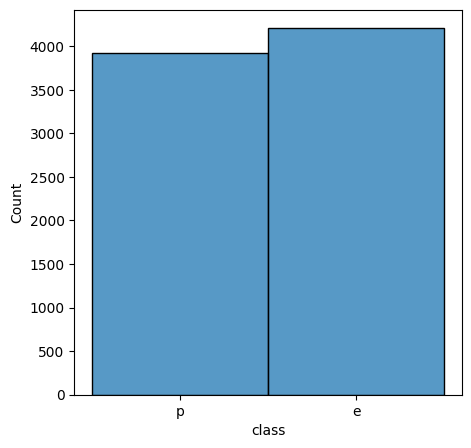

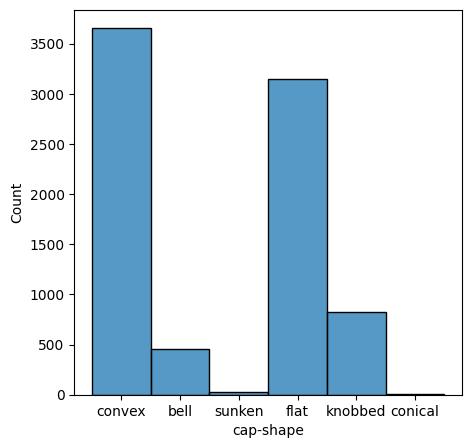

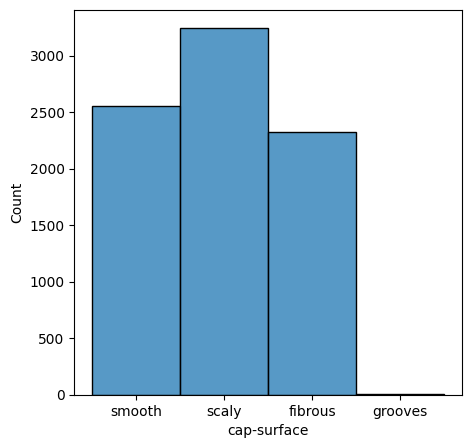

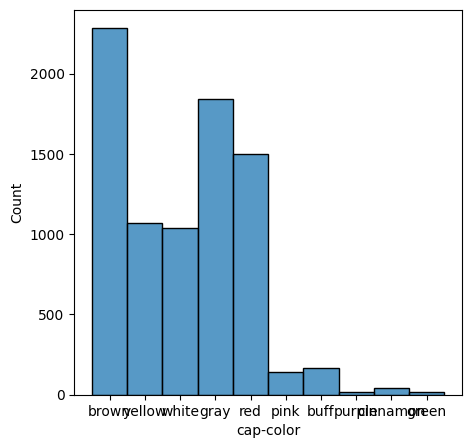

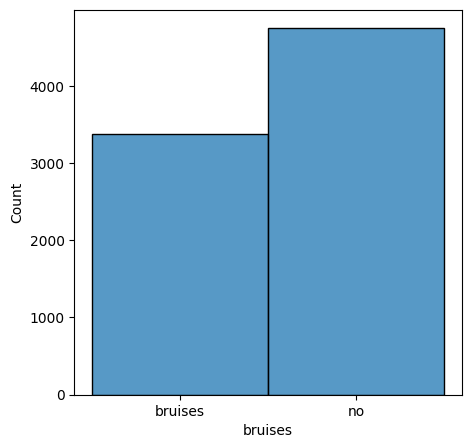

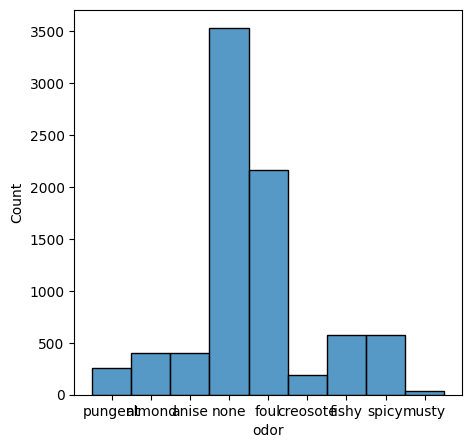

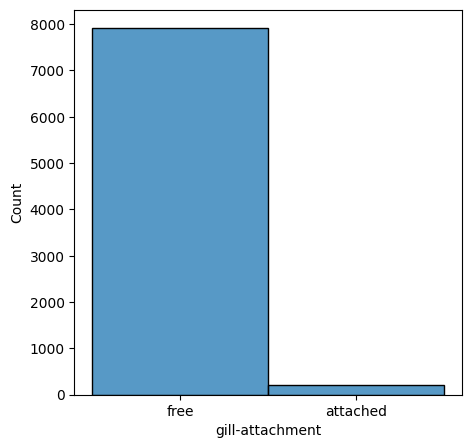

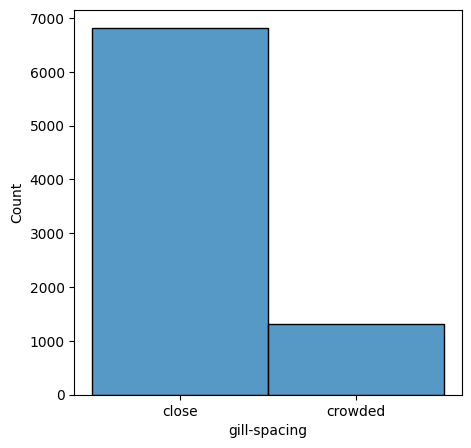

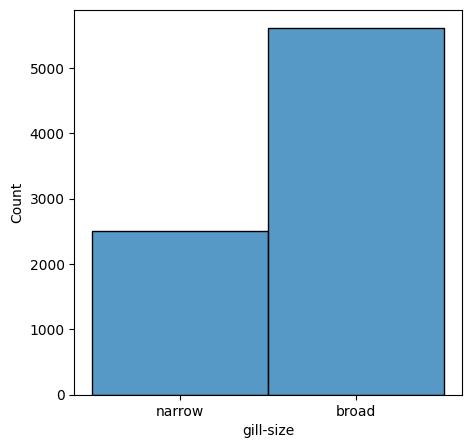

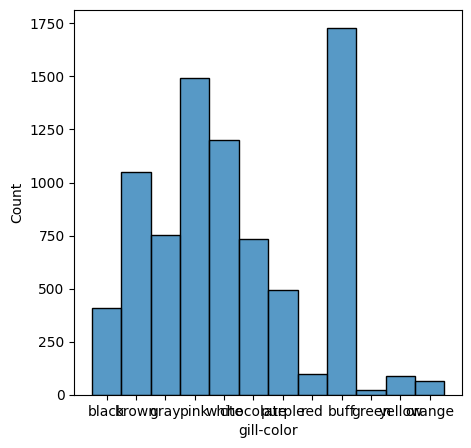

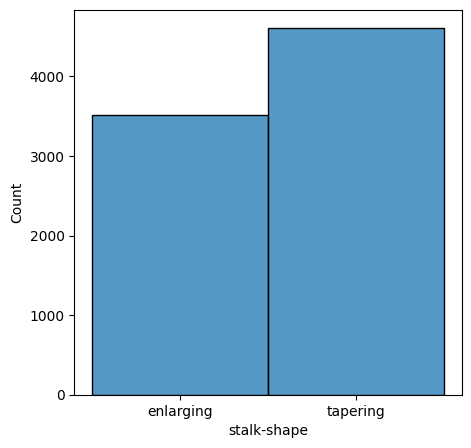

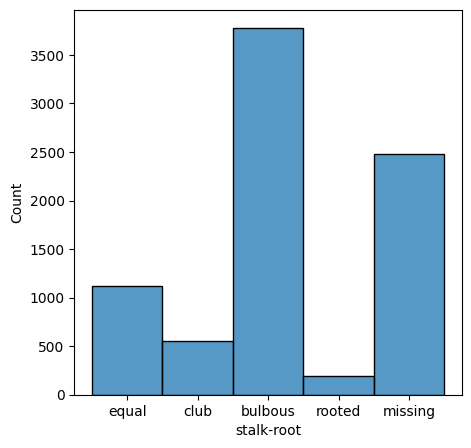

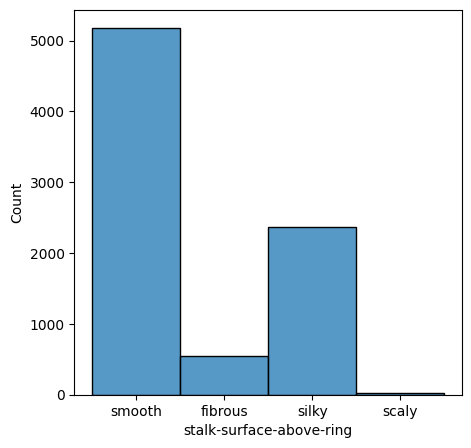

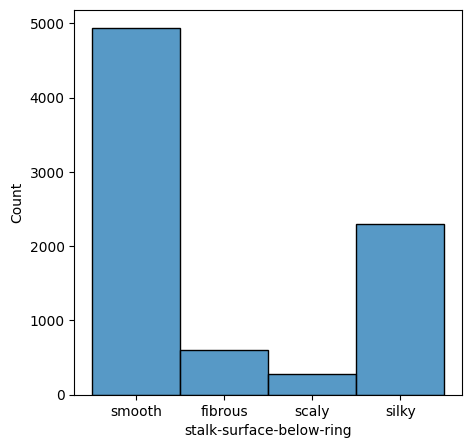

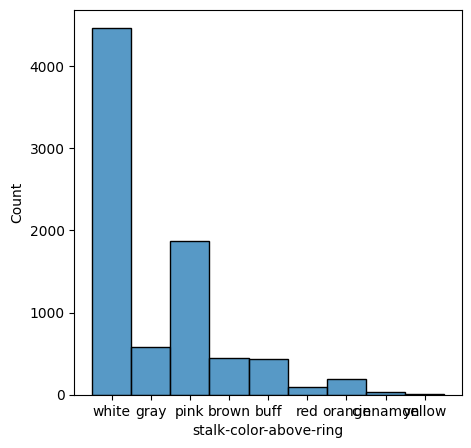

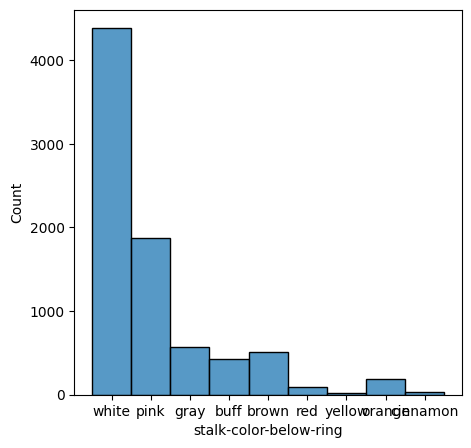

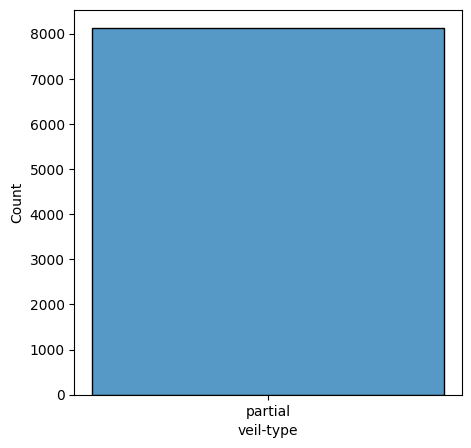

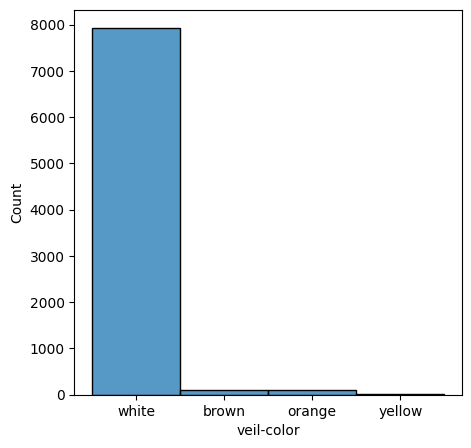

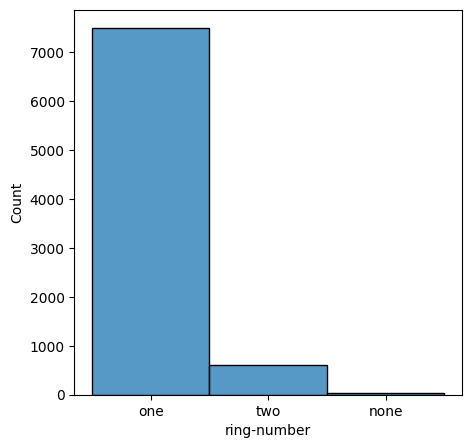

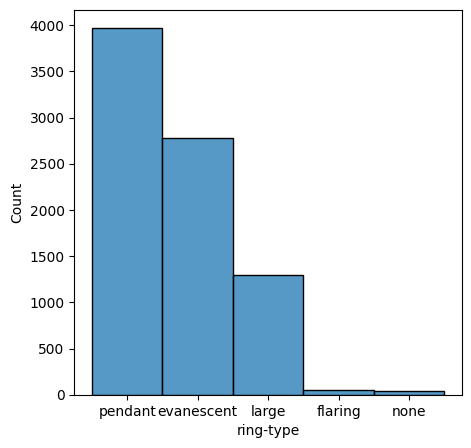

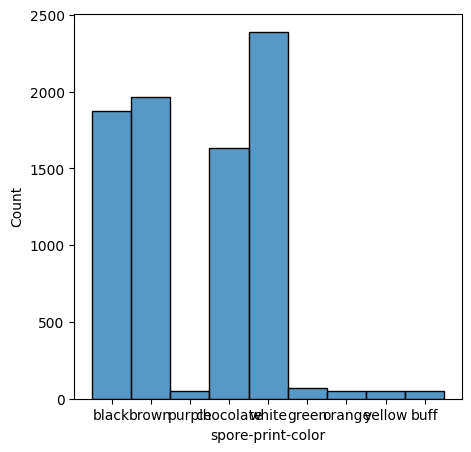

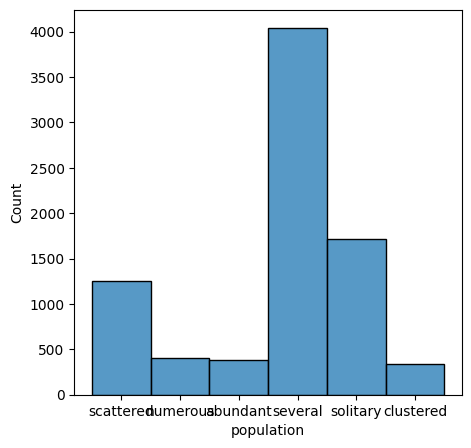

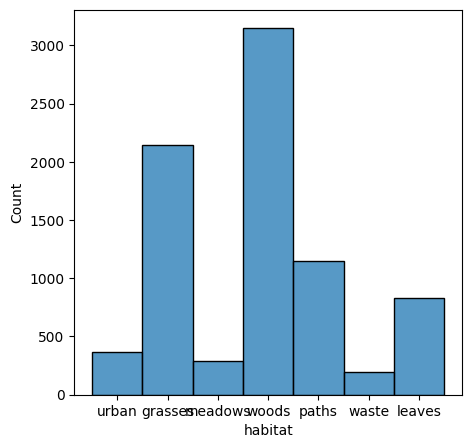

In [ ]:
#visualize distribution of each feature
index=0
col=len(df.columns)
while index < col:
  plt.figure(figsize=(5, 5))
  sns.histplot(df.iloc[:, index])
  index += 1

In [ ]:
#define x (features) and y (target)
y=df['class']
x=df.drop(columns='class')
print(y, '/n', x)

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object /n      cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0       convex      smooth     brown  bruises  pungent            free   
1       convex      smooth    yellow  bruises   almond            free   
2         bell      smooth     white  bruises    anise            free   
3       convex       scaly     white  bruises  pungent            free   
4       convex      smooth      gray       no     none            free   
...        ...         ...       ...      ...      ...             ...   
8119   knobbed      smooth     brown       no     none        attached   
8120    convex      smooth     brown       no     none        attached   
8121      flat      smooth     brown       no     none        attached   
8122   knobbed       scaly     brown       no    fishy            free   
8123    convex      smooth     b

We used one hot encoding to change categorial data into numerical data

In [ ]:
#1=poisonous, 0=edible

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)
list(le.classes_)
print(y)

#use one hot encoding for x values to convert values from string to float
ohe=pd.get_dummies(x)
print(ohe)

[1 0 0 ... 0 1 0]
      cap-shape_bell  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
0              False              False              True           False   
1              False              False              True           False   
2               True              False             False           False   
3              False              False              True           False   
4              False              False              True           False   
...              ...                ...               ...             ...   
8119           False              False             False           False   
8120           False              False              True           False   
8121           False              False             False            True   
8122           False              False             False           False   
8123           False              False              True           False   

      cap-shape_knobbed  cap-shape_sunken  cap-surface_fi

In [ ]:
#Split data set into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(ohe, y, test_size=0.3, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Create a decision tree classifier

dtree=DecisionTreeClassifier(random_state=1)
dtree=dtree.fit(x_train, y_train)


We measured specificity instead of accuracy since it’s more important to avoid false positives than false negatives as eating poisonous mushroom  can kill you.

In [ ]:
#Define scorer to measure specificity

from sklearn.metrics import confusion_matrix, make_scorer

y_true = y_test
y_pred = dtree.predict(x_test)


def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred,labels=[0, 1]).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

In [ ]:
from sklearn.metrics import classification_report
print("Specificity Score: ", specificity_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Specificity Score:  1.0
Confusion Matrix: 
 [[1236    0]
 [   0 1202]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



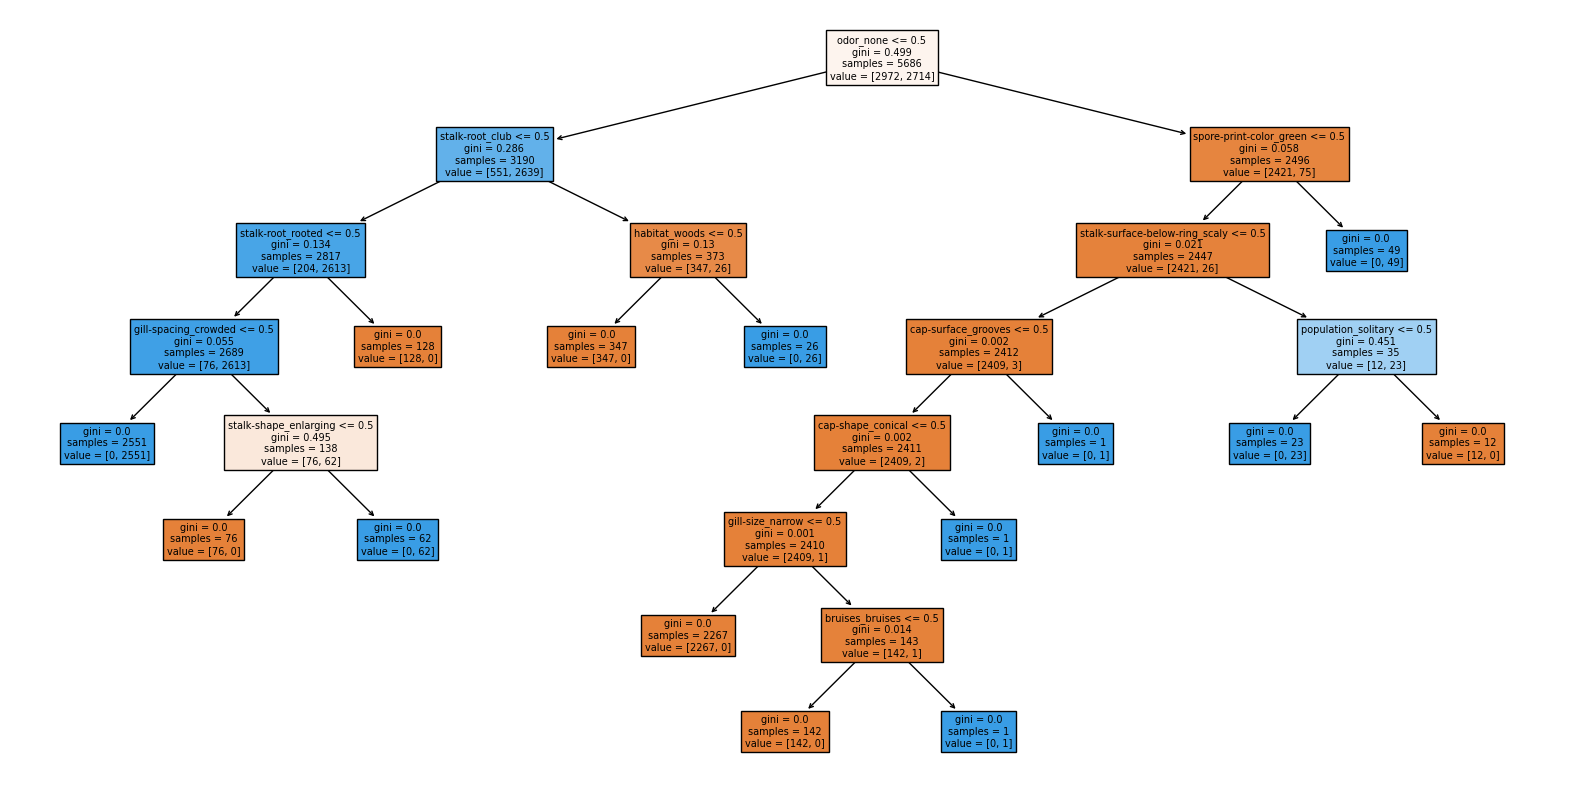

In [ ]:
# Visualize the decision tree, we will use the plot_tree() function from the tree module of the scikit-learn library.

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree,filled=True,feature_names=list(ohe.columns));

In [ ]:
#Tune the model

from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
}

In [ ]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring=specificity_scorer)

grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 21),
                         'min_samples_split': range(2, 21)},
             scoring=make_scorer(specificity_score))

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Specificity Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Specificity Score:  1.0


In [ ]:
best_dtree = grid_search.best_estimator_
best_dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

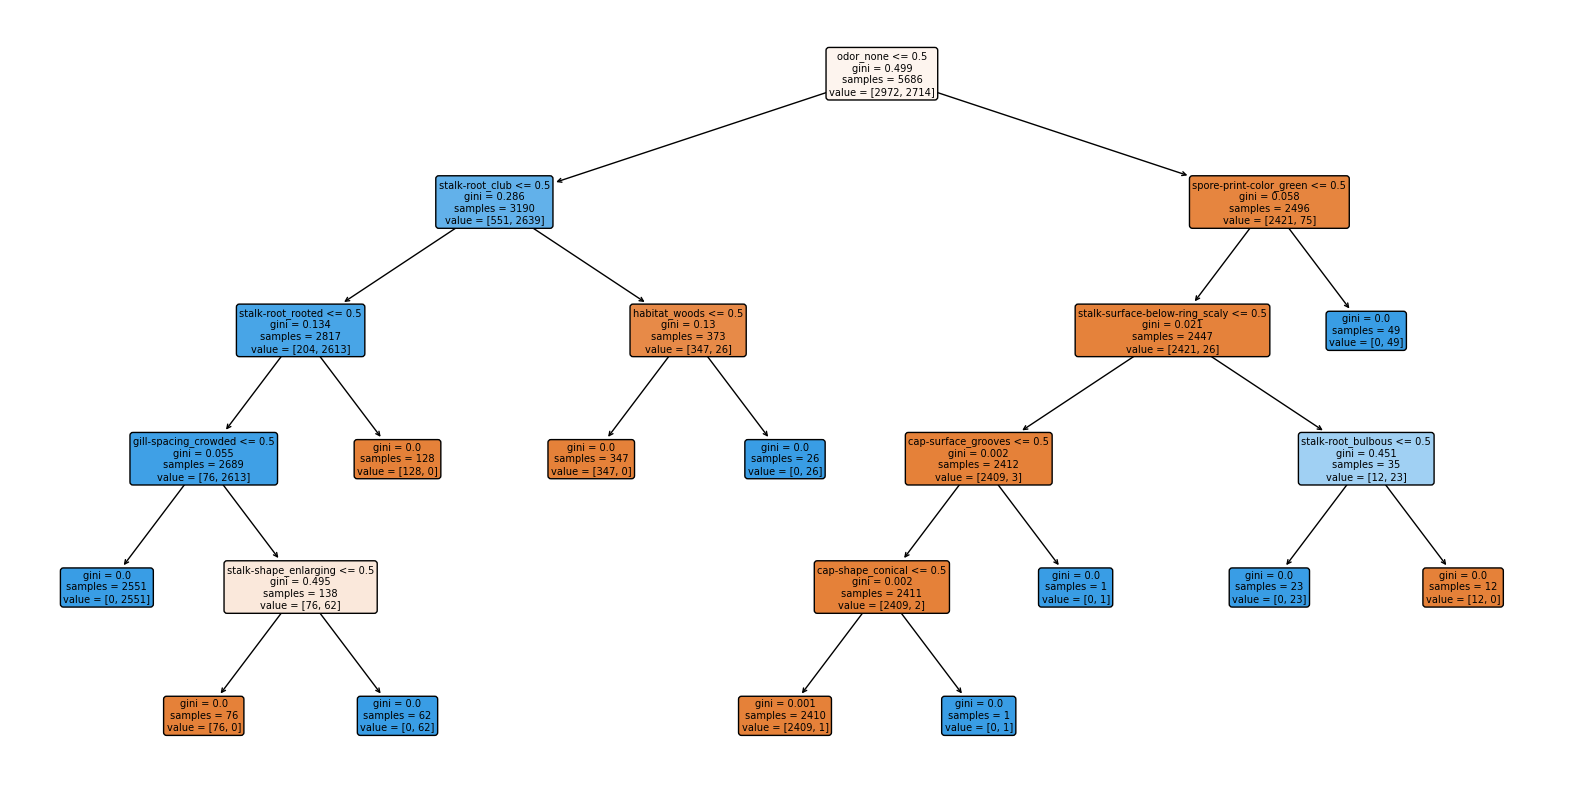

In [ ]:
# Plot the decision tree after tuning

plt.figure(figsize=(20,10))
plot_tree(best_dtree, filled=True, rounded=True,feature_names=list(ohe.columns));

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(best_dtree, out_file=None,
                     filled=True, rounded=True,
                     special_characters=True)

graph = graphviz.Source(dot_data)
graph
graph.format = 'png'
graph.render('mushroomdecisiontree', cleanup=True)

'mushroomdecisiontree.png'

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 1.75797584e-04 3.51157860e-04 2.77372996e-03
 5.22045741e-03 8.50779724e-03 1.20101750e-02 1.39666064e-02
 1.65397998e-02 4.05820779e-02 8.52665382e-02 3.13049480e-01]


Prune the tree.

In [ ]:
#Find the effective alphas for the training set. ccp_alph would prune the tree.

from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

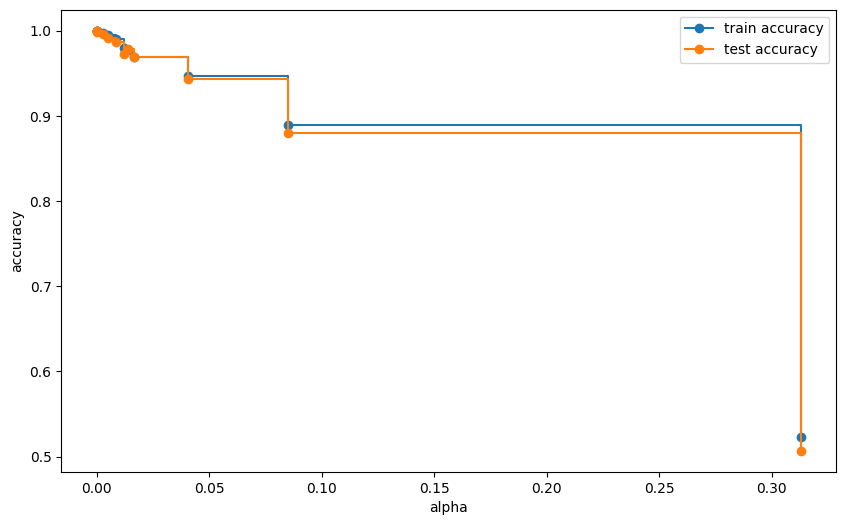

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', drawstyle="steps-post", label="train accuracy")
plt.plot(ccp_alphas, test_scores, marker='o', drawstyle="steps-post", label="test accuracy")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
plt.show()

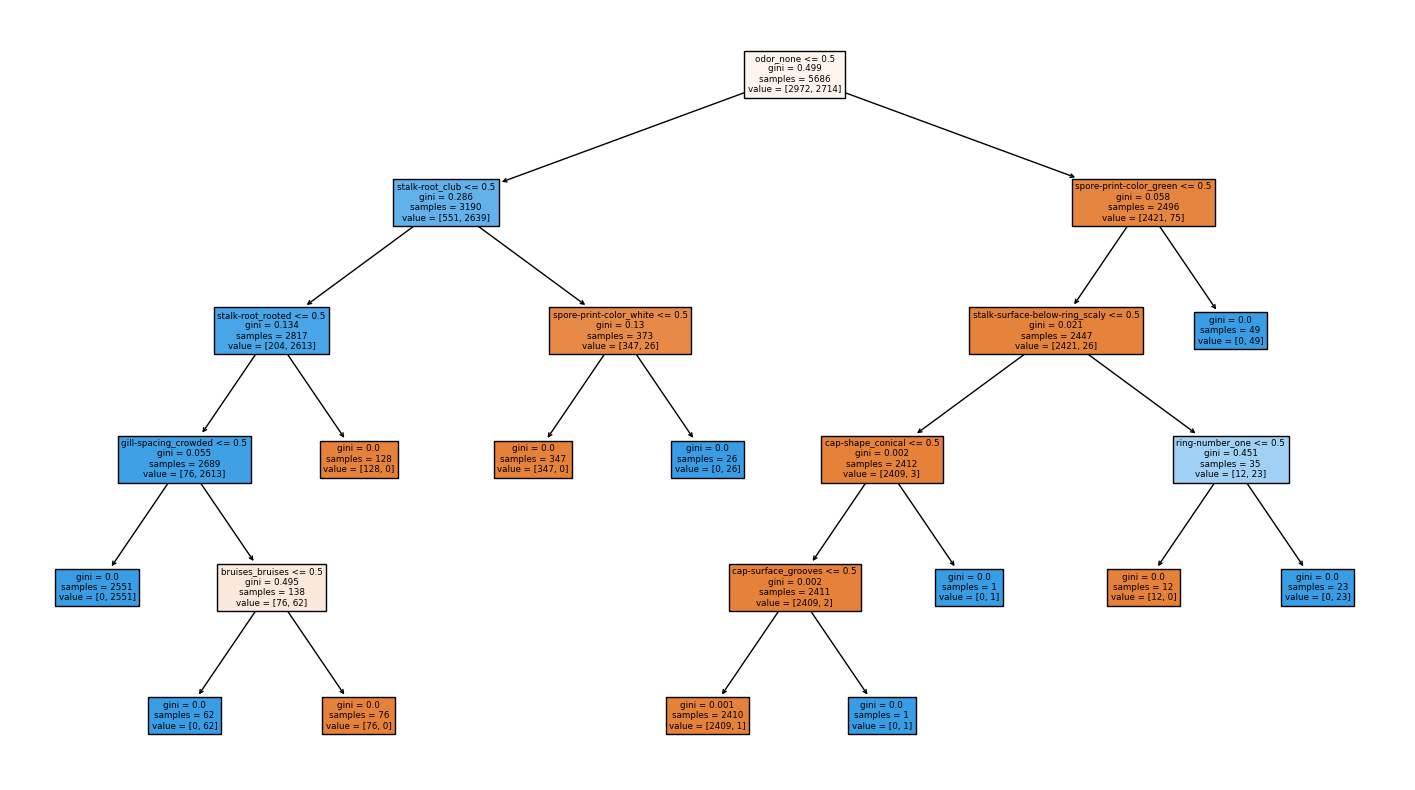

In [ ]:
# Plot the pruned tree
optimal_ccp_alpha = ccp_alphas[np.argmax(test_scores)]

optimal_index = np.argmax(test_scores)
optimal_ccp_alpha = ccp_alphas[optimal_index]

#make a higher ccp_alpha
higher_ccp_alpha = ccp_alphas[min(optimal_index + 1, len(ccp_alphas) - 1)]


clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=higher_ccp_alpha )
clf_pruned.fit(x_train, y_train)

plt.figure(figsize=(18,10))
plot_tree(clf_pruned, filled=True,feature_names=list(ohe.columns));

In [ ]:
print(optimal_ccp_alpha)

0.0


# Conclusion

We aimed to develop a machine-learning model to classify mushrooms as either edible or poisonous based on various features.

As mentioned in the introduction, foraging for mushrooms has been a common practice for a long time, and it is gaining popularity again. Therefore, creating a reliable model to classify mushrooms can be incredibly helpful and potentially life-saving.

The most crucial aspect of our model is to avoid false positivesーmistaking poisonous mushrooms for edible onesーwhich can lead to severe health problems or even death. Hence, accuracy was our paramount in our classification efforts. We eventualy chose to use the original decision tree because although it was less efficient, it was more accurate than the tuned or pruned one.

### Results
Based on our decision tree's structure, we identified the top priorities for determining if a mushroom is edible or not:

1. Odor
- The presence or absence of odor is the most
significant factor.
- Absence of Odor: Mushrooms with no specific odor are more likely to be edible.
- Presence of Odor: Mushrooms with an odor are more likely to be poisonous. Certain specific odors can be strong indicators of toxicity.

2. Spore print color
- After odor, the next feature to check is the spore print color.
- Green Spore Prints: Mushrooms with green spore prints are less likely to be edible.

3. Stalk Features
- Stalk Root: Check if the stalk root is club-shaped or rooted. This is especially relevant when the mushroom has an odor. Those can indicate nonedibility.

Other important feature to consider include:

4. Gill Characteristics
- Crowded and narrowed gills are good indicators of edibility.

5. Cap Features
- Grooves and conical shapes can refine classification.

6. Habitat
- Growing in woods can be an additional clue.

7. Population and Bruises
- These features can provide the final confirmation.

### Future Work

- Feature Engineering:

Extra include buildings might offer assistance reveal modern designs within the information. For illustration, combining existing highlights or making unused inferred highlights might move forward the model's prescient control.

- Real-World Testing

Applying the model to real foraging scenarios would be a valuable next step. Field testing would help validate the model in practical applications and provide insight into necessity adjustments.

- Public Education and Awareness
The model that we created can be used to increase public awareness of mushroom safety. Creating apps and websites could be developed to accurately identify mushrooms.


These steps make our model more accurate and make it a practical tool for mushroom foraging and safety education.  

